In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import tensorboard as tb

import tensorflow as tf
from tensorflow.python.summary.summary_iterator import summary_iterator
from matplotlib import pyplot as plt
from scipy import stats
import tbparser

In [3]:
def get_losses(tensorboard_file, train_tags, test_tags, valid_tags):
    ## validation results 
    valid_results = []
    reader = SummaryReader(tensorboard_file, tag_filter=valid_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "valid"]
        if item[0] == "val/valid-loss":
            print("HI")
        valid_results.append(datapoint)
    valid_df = pd.DataFrame(valid_results, columns=['tag', 'epoch', 'value', 'stage'])
    
    ## train results 
    train_results = []
    reader = SummaryReader(tensorboard_file, tag_filter=train_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "train"]
        train_results.append(datapoint)
    train_df = pd.DataFrame(train_results, columns=['tag', 'epoch', 'value', 'stage'])
    
    ## test results 
    test_results = []
    reader = SummaryReader(tensorboard_file, tag_filter=test_tags)
    for item in reader: 
        datapoint = [item[0], item[1], item[3], "test"]
        test_results.append(datapoint)
    test_df = pd.DataFrame(test_results, columns=['tag', 'epoch', 'value', 'stage'])
    
    return valid_df, train_df, test_df

# reading in / writing results to df's

In [4]:
from tbparser.summary_reader import SummaryReader

In [5]:
train_taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]

In [6]:
train_tags = ['train/train-loss']
for i in range(10): 
    class_tags = [] 
    for tau in train_taus: 
        loss_name = "train/class-" + str(i) + "-loss-{}".format(tau)
        class_tags.append(loss_name)
    train_tags.extend(class_tags)

In [7]:
test_tags = ['test/test-loss']
for i in range(10): 
    class_tags = [] 
    for tau in train_taus: 
        loss_name = "test/class-" + str(i) + "-loss-{}".format(tau)
        class_tags.append(loss_name)
    test_tags.extend(class_tags)

In [8]:
valid_tags = ['val/val-loss']
for i in range(10): 
    class_tags = [] 
    for tau in train_taus: 
        loss_name = "val/class-" + str(i) + "-loss-{}".format(tau)
        class_tags.append(loss_name)
    valid_tags.extend(class_tags)

In [9]:
train_tags[:5]

['train/train-loss',
 'train/class-0-loss-0.1',
 'train/class-0-loss-0.2',
 'train/class-0-loss-0.3',
 'train/class-0-loss-0.4']

In [10]:
test_tags[:5]

['test/test-loss',
 'test/class-0-loss-0.1',
 'test/class-0-loss-0.2',
 'test/class-0-loss-0.3',
 'test/class-0-loss-0.4']

In [11]:
valid_tags[:5]

['val/val-loss',
 'val/class-0-loss-0.1',
 'val/class-0-loss-0.2',
 'val/class-0-loss-0.3',
 'val/class-0-loss-0.4']

In [12]:
runs = ['debug-traintau-approx-f1-imb-0.125-0', 'debug-traintau-approx-f1-imb-0.5-0', 'debug-traintau-approx-f1-imb-0.8-0']

In [20]:
path = "/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/cifar-10/"
file_path = "/".join([path, "debug-traintau-approx-f1-imb-0.8-0"])

valid_df, train_df, test_df = get_losses(tensorboard_file=file_path, train_tags=train_tags, test_tags=test_tags, 
                                         valid_tags=valid_tags)

In [21]:
valid_df = valid_df.drop_duplicates(subset=['tag', 'epoch'], keep='last')
test_df = test_df.drop_duplicates(subset=['tag', 'epoch'], keep='last')
train_df = train_df.drop_duplicates(subset=['tag', 'epoch'], keep='last')

In [22]:
valid_df = valid_df.sort_values(by=['tag', 'epoch'])
# test_df = test_df.sort_values(by=['tag', 'epoch'])
train_df = train_df.sort_values(by=['tag', 'epoch'])

In [23]:
def add_class_col(row): 
    return row['tag'].split("/")[1].split("-")[1]
def add_etau_col(row):
    if (row['tag'] != "train/train-loss"): 
        return row['tag'].split("/")[1].split("-")[3]

In [24]:
valid_df

,tag,epoch,value,stage
26180,val/class-0-loss-0.1,0,0.161580,valid
26290,val/class-0-loss-0.1,1,0.284091,valid
26400,val/class-0-loss-0.1,2,0.345679,valid
26510,val/class-0-loss-0.1,3,0.336996,valid
26620,val/class-0-loss-0.1,4,0.418182,valid
...,...,...,...,...
25739,val/class-9-loss-0.9,233,0.649351,valid
25849,val/class-9-loss-0.9,234,0.658385,valid
25959,val/class-9-loss-0.9,235,0.741573,valid
26069,val/class-9-loss-0.9,236,0.720000,valid


In [25]:
valid_df['class'] = valid_df.apply(add_class_col, axis=1)
test_df['class'] = test_df.apply(add_class_col, axis=1)
train_df['class'] = train_df.apply(add_class_col, axis=1)

In [26]:
train_df.head()

,tag,epoch,value,stage,class
26417,train/class-0-loss-0.1,0,0.156616,train,0
26528,train/class-0-loss-0.1,1,0.335025,train,0
26639,train/class-0-loss-0.1,2,0.347458,train,0
26750,train/class-0-loss-0.1,3,0.412698,train,0
26861,train/class-0-loss-0.1,4,0.336364,train,0


In [27]:
valid_df['eval-tau'] = valid_df.apply(add_etau_col, axis=1)
# test_df['eval-tau'] = test_df.apply(add_etau_col, axis=1)
train_df['eval-tau'] = train_df.apply(add_etau_col, axis=1)

In [28]:
## need to plot, per class, and per train tau (all eval tau curves)
## per class 
## per train tau -> dataframe is already for train tau 0.125 

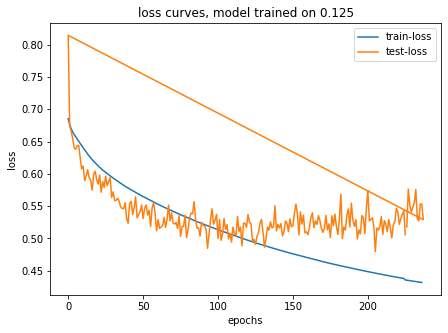

In [29]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
xs = train_df['epoch'].unique()
xs = xs[0:len(xs)-1]

plt.plot(xs, train_df[train_df['tag'] == "train/train-loss"]['value'], label="train-loss")
plt.plot(test_df['epoch'].unique(), test_df[test_df['tag'] == "test/test-loss"]['value'], label="test-loss")

plt.title("loss curves, model trained on 0.125")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [30]:
train_df.head()

,tag,epoch,value,stage,class,eval-tau
26417,train/class-0-loss-0.1,0,0.156616,train,0,0.1
26528,train/class-0-loss-0.1,1,0.335025,train,0,0.1
26639,train/class-0-loss-0.1,2,0.347458,train,0,0.1
26750,train/class-0-loss-0.1,3,0.412698,train,0,0.1
26861,train/class-0-loss-0.1,4,0.336364,train,0,0.1


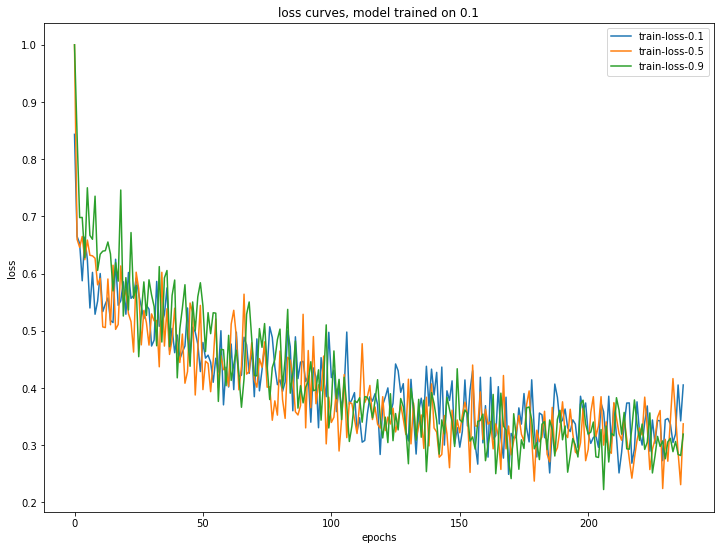

In [31]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,9)
xs = train_df['epoch'].unique()

eval_taus = [0.1, 0.5, 0.9]
for tau in eval_taus: 
    sub_df = train_df[(train_df['class']==str(0)) & (train_df['eval-tau'] == str(tau))]
    plt.plot(xs, 1-sub_df['value'], label="train-loss-{}".format(tau))

plt.title("loss curves, model trained on 0.1")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

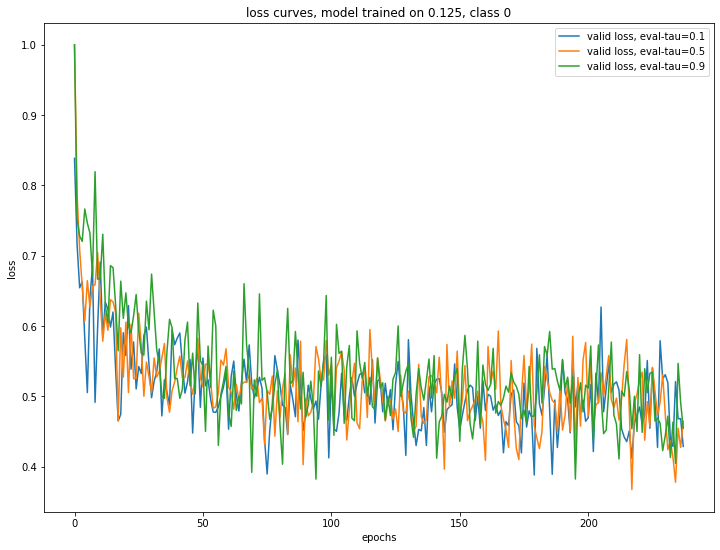

In [32]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,9)
xs = valid_df['epoch'].unique()

class_val = 0 
# eval_taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
eval_taus = [0.1, 0.5, 0.9]
for tau in eval_taus: 
    sub_df = valid_df[(valid_df['class'] == str(class_val)) & (valid_df['eval-tau'] == str(tau))]
    plt.plot(xs, 1-sub_df['value'], label="valid loss, eval-tau={}".format(tau))

plt.title("loss curves, model trained on 0.125, class {}".format(class_val))
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
# finding undertrained classes and eval taus
eval_taus = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9]
for i in range(10): 
    for tau in eval_taus: 
        sub_df = valid_df[(valid_df['class'] == str(i)) & (valid_df['eval-tau'] == str(tau))]
        sub_df['loss'] = 1 - sub_df['value']
        sub_df = sub_df[sub_df.epoch != 0]
        min_loss_epoch = sub_df[sub_df.loss == sub_df.loss.min()]['epoch'].item()
        total_epochs = len(sub_df.epoch.unique())
        if total_epochs - min_loss_epoch < 50: 
            print("For Class {}, Eval Tau: {}, Min Loss: {:.3f}, Min Loss Epoch: {}, Epochs: {}".format(
                i, tau, sub_df.loss.min(), min_loss_epoch,total_epochs))

For Class 0, Eval Tau: 0.4, Min Loss: 0.387, Min Loss Epoch: 227, Epochs: 237
For Class 0, Eval Tau: 0.45, Min Loss: 0.388, Min Loss Epoch: 234, Epochs: 237
For Class 0, Eval Tau: 0.5, Min Loss: 0.367, Min Loss Epoch: 217, Epochs: 237
For Class 1, Eval Tau: 0.1, Min Loss: 0.305, Min Loss Epoch: 229, Epochs: 237
For Class 1, Eval Tau: 0.2, Min Loss: 0.323, Min Loss Epoch: 199, Epochs: 237
For Class 1, Eval Tau: 0.3, Min Loss: 0.336, Min Loss Epoch: 228, Epochs: 237
For Class 1, Eval Tau: 0.4, Min Loss: 0.320, Min Loss Epoch: 227, Epochs: 237
For Class 1, Eval Tau: 0.5, Min Loss: 0.330, Min Loss Epoch: 229, Epochs: 237
For Class 1, Eval Tau: 0.55, Min Loss: 0.278, Min Loss Epoch: 226, Epochs: 237
For Class 1, Eval Tau: 0.6, Min Loss: 0.304, Min Loss Epoch: 230, Epochs: 237
For Class 1, Eval Tau: 0.7, Min Loss: 0.296, Min Loss Epoch: 237, Epochs: 237
For Class 1, Eval Tau: 0.9, Min Loss: 0.302, Min Loss Epoch: 237, Epochs: 237
For Class 2, Eval Tau: 0.1, Min Loss: 0.547, Min Loss Epoch: 2

In [35]:
valid_df[(valid_df['class'] == str(1))].sort_values(['epoch', 'tag'])

,tag,epoch,value,stage,class,eval-tau
26181,val/class-1-loss-0.1,0,0.000000,valid,1,0.1
26191,val/class-1-loss-0.2,0,0.000000,valid,1,0.2
26201,val/class-1-loss-0.3,0,0.000000,valid,1,0.3
26211,val/class-1-loss-0.4,0,0.000000,valid,1,0.4
26221,val/class-1-loss-0.45,0,0.000000,valid,1,0.45
...,...,...,...,...,...,...
26131,val/class-1-loss-0.55,237,0.657407,valid,1,0.55
26141,val/class-1-loss-0.6,237,0.672811,valid,1,0.6
26151,val/class-1-loss-0.7,237,0.704225,valid,1,0.7
26161,val/class-1-loss-0.8,237,0.687500,valid,1,0.8


In [36]:
# also should go ahead and average across all of the evaluation taus 
# for a single train-tau, for a SINGLE class, average all the eval-tau values together 
test = valid_df[(valid_df['class'] == str(1))].groupby(['epoch']).mean().reset_index()['value'].tolist()
test = [1 - x for x in test]

In [37]:
test = np.array(test)
min_epoch = np.argmin(test)

In [38]:
print(min_epoch)
print(len(test))

237
238


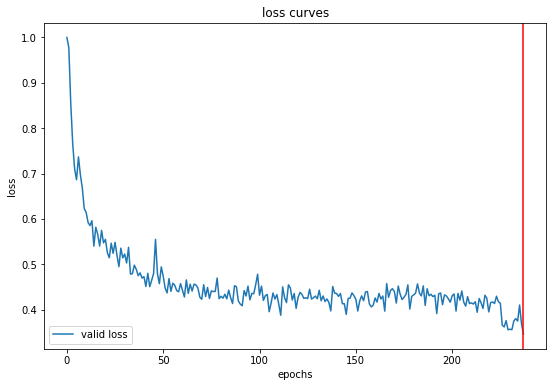

In [39]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,6)
xs = range(len(test))

plt.plot(xs, test, label="valid loss")
plt.axvline(x=min_epoch, color='r')
plt.title("loss curves")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

In [40]:
valid_df = valid_df.drop(valid_df.tail(1).index)
test_df = test_df.drop(test_df.tail(1).index)

ValueError: x and y must have same first dimension, but have shapes (26179,) and (237,)

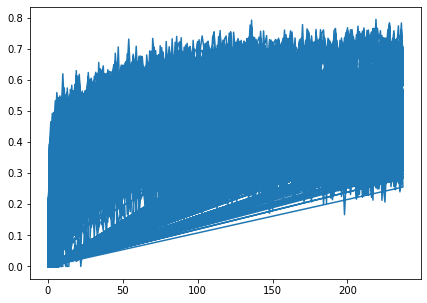

In [41]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
xs = valid_df['epoch']
plt.plot(xs, valid_df['value'], label="valid")
plt.plot(xs, test_df['value'], label="test")
plt.plot(xs, train_df['value'], label="train")

plt.title("loss curves, model trained on 0.1")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

# looking at 0.125 

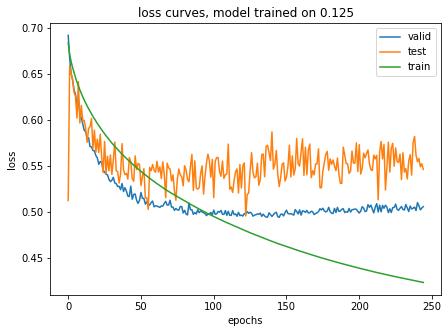

In [38]:
path = "/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/cifar-10/20201208-runs/v3-traintau-approx-f1-imb-0.125-2"
train_tags = ['train/train-loss']
test_tags = ['test/test-loss']
valid_tags = ['val/valid-loss']
valid_df, train_df, test_df = get_losses(tensorboard_file=path, train_tags=train_tags, 
                                         test_tags=test_tags, valid_tags=valid_tags)

valid_df = valid_df.drop(valid_df.tail(1).index)
test_df = test_df.drop(test_df.tail(1).index)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
xs = valid_df['epoch']
plt.plot(xs, valid_df['value'], label="valid")
plt.plot(xs, test_df['value'], label="test")
plt.plot(xs, train_df['value'], label="train")

plt.title("loss curves, model trained on 0.125")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()


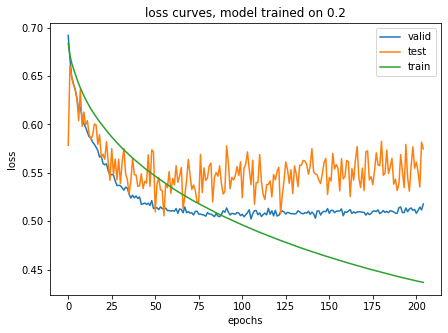

In [39]:
path = "/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/cifar-10/20201208-runs/v3-traintau-approx-f1-imb-0.2-2"
train_tags = ['train/train-loss']
test_tags = ['test/test-loss']
valid_tags = ['val/valid-loss']
valid_df, train_df, test_df = get_losses(tensorboard_file=path, train_tags=train_tags, 
                                         test_tags=test_tags, valid_tags=valid_tags)

valid_df = valid_df.drop(valid_df.tail(1).index)
test_df = test_df.drop(test_df.tail(1).index)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
xs = valid_df['epoch']
plt.plot(xs, valid_df['value'], label="valid")
plt.plot(xs, test_df['value'], label="test")
plt.plot(xs, train_df['value'], label="train")

plt.title("loss curves, model trained on 0.2")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()


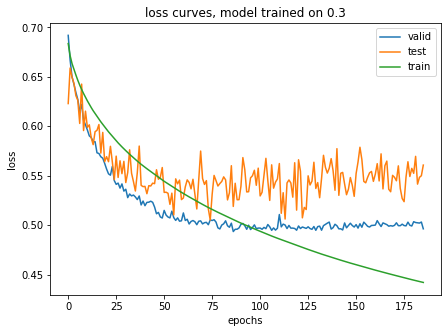

In [40]:
path = "/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/cifar-10/20201208-runs/v3-traintau-approx-f1-imb-0.3-2"
train_tags = ['train/train-loss']
test_tags = ['test/test-loss']
valid_tags = ['val/valid-loss']
valid_df, train_df, test_df = get_losses(tensorboard_file=path, train_tags=train_tags, 
                                         test_tags=test_tags, valid_tags=valid_tags)

valid_df = valid_df.drop(valid_df.tail(1).index)
test_df = test_df.drop(test_df.tail(1).index)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
xs = valid_df['epoch']
plt.plot(xs, valid_df['value'], label="valid")
plt.plot(xs, test_df['value'], label="test")
plt.plot(xs, train_df['value'], label="train")

plt.title("loss curves, model trained on 0.3")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()


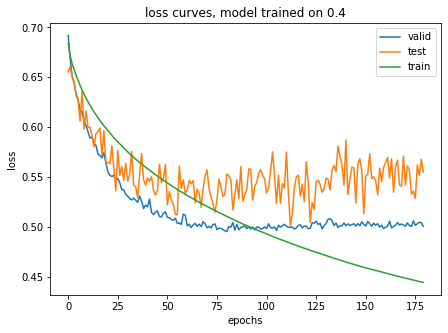

In [41]:
path = "/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/cifar-10/20201208-runs/v3-traintau-approx-f1-imb-0.4-2"
train_tags = ['train/train-loss']
test_tags = ['test/test-loss']
valid_tags = ['val/valid-loss']
valid_df, train_df, test_df = get_losses(tensorboard_file=path, train_tags=train_tags, 
                                         test_tags=test_tags, valid_tags=valid_tags)

valid_df = valid_df.drop(valid_df.tail(1).index)
test_df = test_df.drop(test_df.tail(1).index)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
xs = valid_df['epoch']
plt.plot(xs, valid_df['value'], label="valid")
plt.plot(xs, test_df['value'], label="test")
plt.plot(xs, train_df['value'], label="train")

plt.title("loss curves, model trained on 0.4")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()


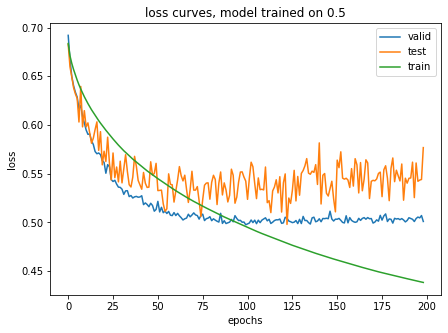

In [42]:
path = "/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/cifar-10/20201208-runs/v3-traintau-approx-f1-imb-0.5-2"
train_tags = ['train/train-loss']
test_tags = ['test/test-loss']
valid_tags = ['val/valid-loss']
valid_df, train_df, test_df = get_losses(tensorboard_file=path, train_tags=train_tags, 
                                         test_tags=test_tags, valid_tags=valid_tags)

valid_df = valid_df.drop(valid_df.tail(1).index)
test_df = test_df.drop(test_df.tail(1).index)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
xs = valid_df['epoch']
plt.plot(xs, valid_df['value'], label="valid")
plt.plot(xs, test_df['value'], label="test")
plt.plot(xs, train_df['value'], label="train")

plt.title("loss curves, model trained on 0.5")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()


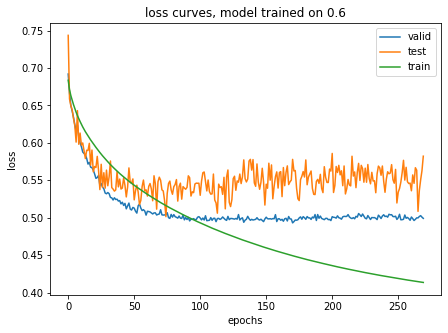

In [43]:
path = "/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/cifar-10/20201208-runs/v3-traintau-approx-f1-imb-0.6-2"
train_tags = ['train/train-loss']
test_tags = ['test/test-loss']
valid_tags = ['val/valid-loss']
valid_df, train_df, test_df = get_losses(tensorboard_file=path, train_tags=train_tags, 
                                         test_tags=test_tags, valid_tags=valid_tags)

valid_df = valid_df.drop(valid_df.tail(1).index)
test_df = test_df.drop(test_df.tail(1).index)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
xs = valid_df['epoch']
plt.plot(xs, valid_df['value'], label="valid")
plt.plot(xs, test_df['value'], label="test")
plt.plot(xs, train_df['value'], label="train")

plt.title("loss curves, model trained on 0.6")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()


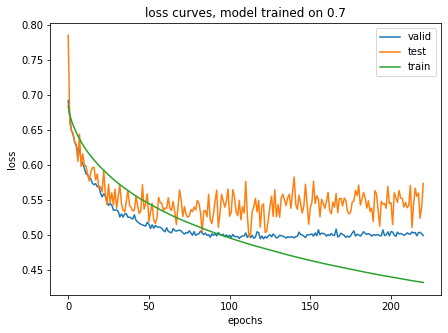

In [44]:
path = "/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/cifar-10/20201208-runs/v3-traintau-approx-f1-imb-0.7-2"
train_tags = ['train/train-loss']
test_tags = ['test/test-loss']
valid_tags = ['val/valid-loss']
valid_df, train_df, test_df = get_losses(tensorboard_file=path, train_tags=train_tags, 
                                         test_tags=test_tags, valid_tags=valid_tags)

valid_df = valid_df.drop(valid_df.tail(1).index)
test_df = test_df.drop(test_df.tail(1).index)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
xs = valid_df['epoch']
plt.plot(xs, valid_df['value'], label="valid")
plt.plot(xs, test_df['value'], label="test")
plt.plot(xs, train_df['value'], label="train")

plt.title("loss curves, model trained on 0.7")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()


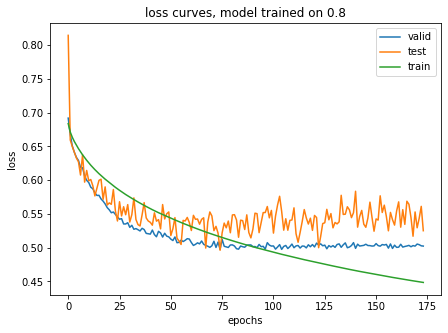

In [45]:
path = "/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/cifar-10/20201208-runs/v3-traintau-approx-f1-imb-0.8-2"
train_tags = ['train/train-loss']
test_tags = ['test/test-loss']
valid_tags = ['val/valid-loss']
valid_df, train_df, test_df = get_losses(tensorboard_file=path, train_tags=train_tags, 
                                         test_tags=test_tags, valid_tags=valid_tags)

valid_df = valid_df.drop(valid_df.tail(1).index)
test_df = test_df.drop(test_df.tail(1).index)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
xs = valid_df['epoch']
plt.plot(xs, valid_df['value'], label="valid")
plt.plot(xs, test_df['value'], label="test")
plt.plot(xs, train_df['value'], label="train")

plt.title("loss curves, model trained on 0.8")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()


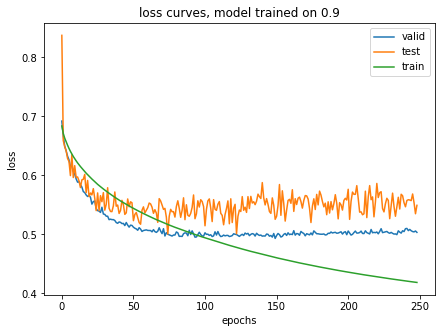

In [46]:
path = "/Users/taesoodaniellee/Documents/heaviside/multiclass_src/tensorboard/cifar-10/20201208-runs/v3-traintau-approx-f1-imb-0.9-2"
train_tags = ['train/train-loss']
test_tags = ['test/test-loss']
valid_tags = ['val/valid-loss']
valid_df, train_df, test_df = get_losses(tensorboard_file=path, train_tags=train_tags, 
                                         test_tags=test_tags, valid_tags=valid_tags)

valid_df = valid_df.drop(valid_df.tail(1).index)
test_df = test_df.drop(test_df.tail(1).index)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)
xs = valid_df['epoch']
plt.plot(xs, valid_df['value'], label="valid")
plt.plot(xs, test_df['value'], label="test")
plt.plot(xs, train_df['value'], label="train")

plt.title("loss curves, model trained on 0.9")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()
